# 선형회귀, 보스턴 집 값

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [8]:
from sklearn import datasets

boston = datasets.load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [9]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [10]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
sr = pd.Series(boston.target, name = 'Target')

In [13]:
df = pd.concat([df, sr], axis = 1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [15]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [16]:
# 중복값

df.duplicated().sum()

0

<AxesSubplot:>

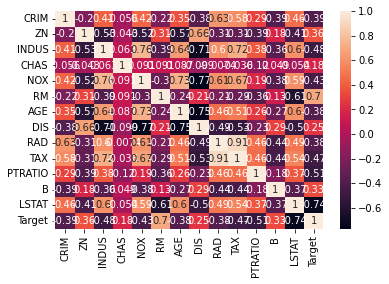

In [20]:
# 상관관계

c = df.corr()
sns.heatmap(c, annot=True)

In [23]:
c['Target'].abs().sort_values(ascending=False)

Target     1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: Target, dtype: float64

In [25]:
# 상관관계 높은 컬럼만 빼기
cols = ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'Target']

df = df.loc[:, cols]
df.head()

,LSTAT,RM,PTRATIO,INDUS,Target
0,4.98,6.575,15.3,2.31,24.0
1,9.14,6.421,17.8,7.07,21.6
2,4.03,7.185,17.8,7.07,34.7
3,2.94,6.998,18.7,2.18,33.4
4,5.33,7.147,18.7,2.18,36.2


In [29]:
x = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [30]:
# 스케일링

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit_transform(x_train)

array([[0.03807947, 0.73858494, 0.35106383, 0.12060117],
       [0.16197572, 0.50431921, 0.42553191, 0.17815249],
       [0.23813466, 0.51809955, 0.61702128, 0.34604106],
       ...,
       [0.20171082, 0.52509255, 0.42553191, 0.13159824],
       [0.22019868, 0.63512958, 0.5106383 , 0.21041056],
       [0.5339404 , 0.55162485, 0.80851064, 0.64662757]])

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2022)

In [32]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [33]:
lm.coef_

array([-0.58911529,  5.37827005, -0.93085118,  0.04850291])

In [34]:
lm.intercept_

12.751687415758084

In [35]:
y_pred = lm.predict(x_test)

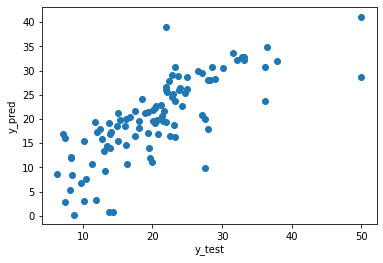

In [39]:
plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [36]:
from sklearn import metrics

print('MAE :', metrics.mean_absolute_error(y_test, y_pred))
print('MSE :', metrics.mean_squared_error(y_test, y_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE : 4.173704641565047
MSE : 32.98818368223755
RMSE : 5.743534076005604


<AxesSubplot:xlabel='Target', ylabel='Density'>

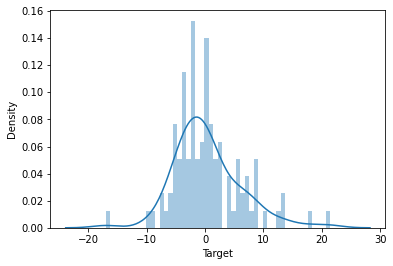

In [37]:
sns.distplot((y_test - y_pred), bins = 50)